<a href="https://colab.research.google.com/github/robert-harr/Getting-started-with-CMSSW/blob/master/NonlinearPendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

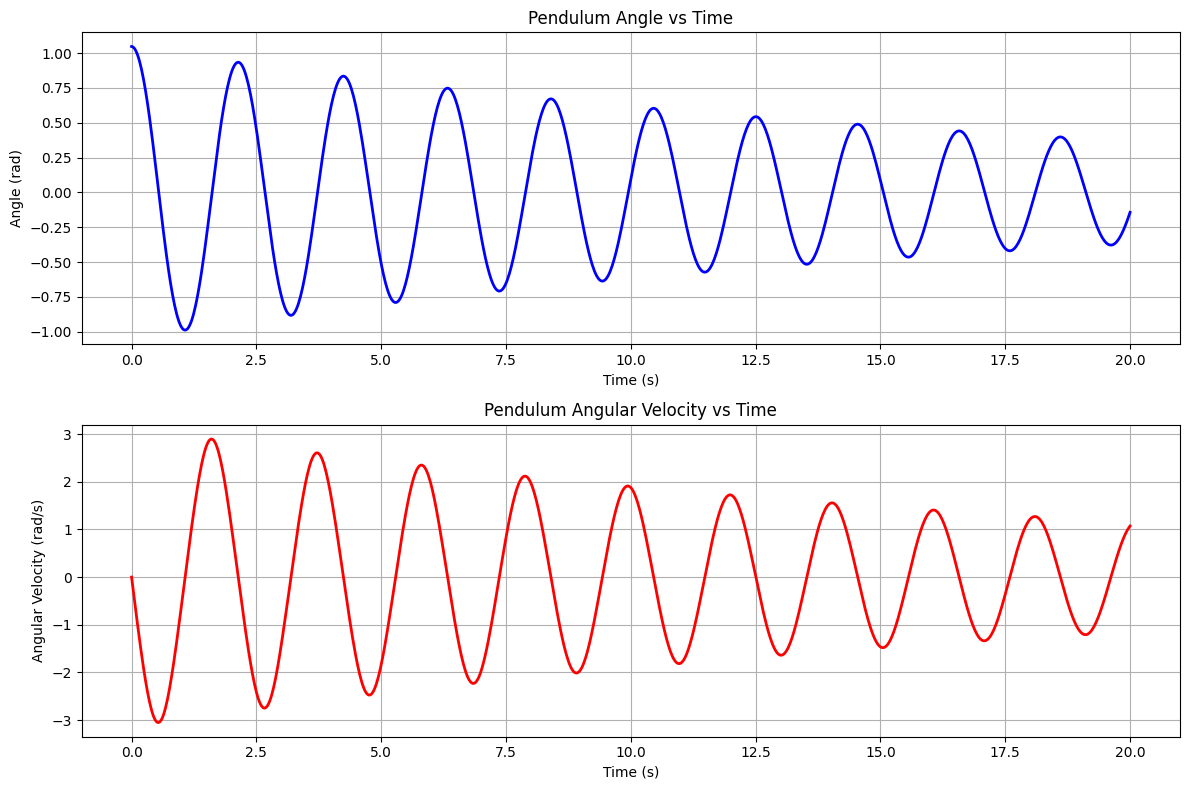

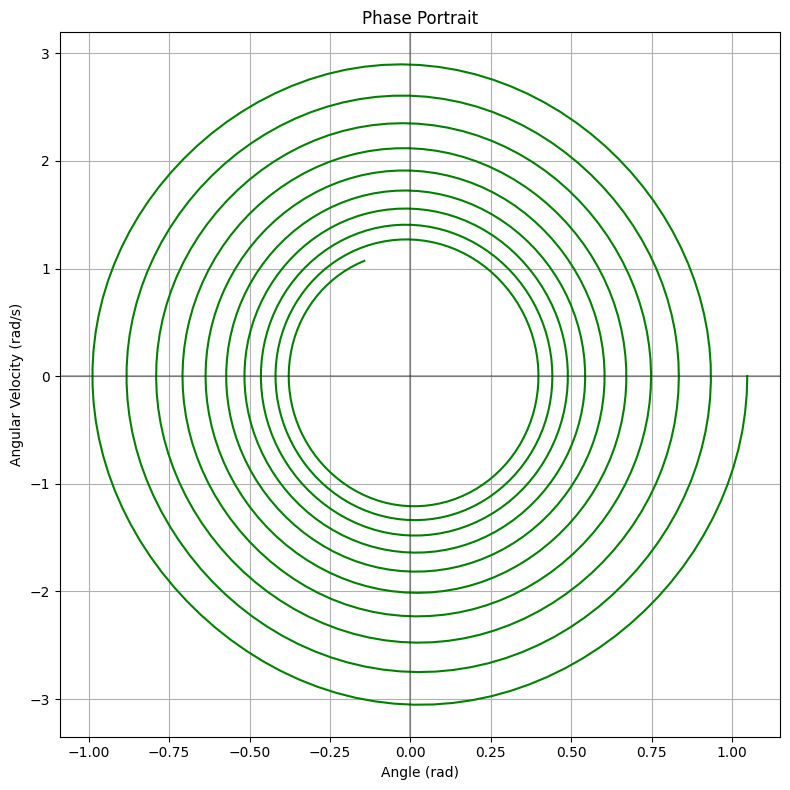

To compare with the linear pendulum approximation, uncomment the code below:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def pendulum_ode(t, y, g, L, damping=0):
    """
    Differential equation for a nonlinear pendulum.

    Parameters:
    - t: time
    - y: array with [theta, omega] where theta is angle and omega is angular velocity
    - g: gravitational acceleration
    - L: pendulum length
    - damping: damping coefficient

    Returns:
    - dydt: array with [dtheta/dt, domega/dt]
    """
    theta, omega = y
    dydt = [
        omega,
        -g/L * np.sin(theta) - damping * omega  # Nonlinear equation with damping
    ]
    return dydt

def solve_pendulum(theta0, omega0, g=9.81, L=1.0, damping=0.1, t_span=(0, 10), t_points=1000):
    """
    Solve the pendulum equation for given initial conditions and parameters.

    Parameters:
    - theta0: initial angle (radians)
    - omega0: initial angular velocity (radians/s)
    - g: gravitational acceleration (m/s^2)
    - L: pendulum length (m)
    - damping: damping coefficient
    - t_span: (start_time, end_time)
    - t_points: number of time points for the solution

    Returns:
    - t: time points
    - theta: angle at each time point
    - omega: angular velocity at each time point
    """
    t_eval = np.linspace(t_span[0], t_span[1], t_points)

    # Solve the ODE
    solution = solve_ivp(
        lambda t, y: pendulum_ode(t, y, g, L, damping),
        t_span,
        [theta0, omega0],
        method='RK45',
        t_eval=t_eval
    )

    return solution.t, solution.y[0], solution.y[1]

def plot_pendulum_solution(t, theta, omega):
    """
    Plot the pendulum solution.

    Parameters:
    - t: time points
    - theta: angle at each time point
    - omega: angular velocity at each time point
    """
    plt.figure(figsize=(12, 8))

    # Plot angle vs time
    plt.subplot(2, 1, 1)
    plt.plot(t, theta, 'b-', linewidth=2)
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('Angle (rad)')
    plt.title('Pendulum Angle vs Time')

    # Plot angular velocity vs time
    plt.subplot(2, 1, 2)
    plt.plot(t, omega, 'r-', linewidth=2)
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('Angular Velocity (rad/s)')
    plt.title('Pendulum Angular Velocity vs Time')

    plt.tight_layout()
    plt.show()

def plot_phase_portrait(theta, omega):
    """
    Plot the phase portrait (theta vs omega).

    Parameters:
    - theta: angle
    - omega: angular velocity
    """
    plt.figure(figsize=(8, 8))
    plt.plot(theta, omega, 'g-', linewidth=1.5)
    plt.grid(True)
    plt.xlabel('Angle (rad)')
    plt.ylabel('Angular Velocity (rad/s)')
    plt.title('Phase Portrait')
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.tight_layout()
    plt.show()

def main():
    # Parameters
    theta0 = np.radians(60)  # Initial angle: 60 degrees
    omega0 = 0.0             # Initial angular velocity: 0
    g = 9.81                 # Gravitational acceleration (m/s^2)
    L = 1.0                  # Pendulum length (m)
    damping = 0.1            # Damping coefficient
    t_span = (0, 20)         # Time span
    t_points = 1000          # Number of time points

    # Solve the pendulum equation
    t, theta, omega = solve_pendulum(theta0, omega0, g, L, damping, t_span, t_points)

    # Plot the results
    plot_pendulum_solution(t, theta, omega)
    plot_phase_portrait(theta, omega)

    # Compare with small-angle approximation (linear pendulum)
    print("To compare with the linear pendulum approximation, uncomment the code below:")
    """
    # Small-angle approximation solution
    omega_0 = np.sqrt(g/L)  # Natural frequency
    t_linear = np.linspace(t_span[0], t_span[1], t_points)
    theta_linear = theta0 * np.cos(omega_0 * t_linear) * np.exp(-damping * t_linear / 2)
    omega_linear = -theta0 * omega_0 * np.sin(omega_0 * t_linear) * np.exp(-damping * t_linear / 2) - \
                   (damping / 2) * theta0 * np.cos(omega_0 * t_linear) * np.exp(-damping * t_linear / 2)

    # Plot comparison
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.plot(t, theta, 'b-', linewidth=2, label='Nonlinear')
    plt.plot(t_linear, theta_linear, 'r--', linewidth=2, label='Linear Approximation')
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('Angle (rad)')
    plt.title('Comparison: Nonlinear vs Linear Pendulum')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(t, omega, 'b-', linewidth=2, label='Nonlinear')
    plt.plot(t_linear, omega_linear, 'r--', linewidth=2, label='Linear Approximation')
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('Angular Velocity (rad/s)')
    plt.legend()

    plt.tight_layout()
    plt.show()
    """

if __name__ == "__main__":
    main()